In [1]:
import skhep_testdata

filename = skhep_testdata.data_path(
    "uproot-Event.root"
)  # downloads this test file and gets a local path to it

import uproot

file = uproot.open(filename)

In [2]:
file.keys()

['ProcessID0;1', 'htime;1', 'T;1', 'hstat;1']

In [3]:
file.classnames()

{'ProcessID0;1': 'TProcessID',
 'htime;1': 'TH1F',
 'T;1': 'TTree',
 'hstat;1': 'TH1F'}

In [4]:
h = file["hstat"]
h

<TH1F (version 2) at 0x0001159722d0>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x165951650>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

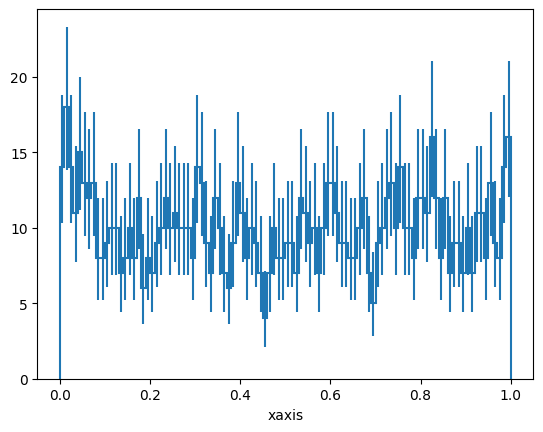

In [5]:
h.to_hist().plot()

In [6]:
h.values()
h.variances()
list(h.axes[0])  # "x", "y", "z" or 0, 1, 2

[array([0.  , 0.01]),
 array([0.01, 0.02]),
 array([0.02, 0.03]),
 array([0.03, 0.04]),
 array([0.04, 0.05]),
 array([0.05, 0.06]),
 array([0.06, 0.07]),
 array([0.07, 0.08]),
 array([0.08, 0.09]),
 array([0.09, 0.1 ]),
 array([0.1 , 0.11]),
 array([0.11, 0.12]),
 array([0.12, 0.13]),
 array([0.13, 0.14]),
 array([0.14, 0.15]),
 array([0.15, 0.16]),
 array([0.16, 0.17]),
 array([0.17, 0.18]),
 array([0.18, 0.19]),
 array([0.19, 0.2 ]),
 array([0.2 , 0.21]),
 array([0.21, 0.22]),
 array([0.22, 0.23]),
 array([0.23, 0.24]),
 array([0.24, 0.25]),
 array([0.25, 0.26]),
 array([0.26, 0.27]),
 array([0.27, 0.28]),
 array([0.28, 0.29]),
 array([0.29, 0.3 ]),
 array([0.3 , 0.31]),
 array([0.31, 0.32]),
 array([0.32, 0.33]),
 array([0.33, 0.34]),
 array([0.34, 0.35]),
 array([0.35, 0.36]),
 array([0.36, 0.37]),
 array([0.37, 0.38]),
 array([0.38, 0.39]),
 array([0.39, 0.4 ]),
 array([0.4 , 0.41]),
 array([0.41, 0.42]),
 array([0.42, 0.43]),
 array([0.43, 0.44]),
 array([0.44, 0.45]),
 array([0.

In [7]:
t = file["T"]
t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | Event                    | AsGroup(<TBranchElement 'ev...
event/TObject        | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
event/TObject/fUn... | uint32_t                 | AsDtype('>u4')
event/TObject/fBits  | uint32_t                 | AsDtype('>u4')
event/fType[20]      | int8_t[20]               | AsDtype("('i1', (20,))")
event/fEventName     | char*                    | AsStrings(length_bytes='4')
event/fNtrack        | int32_t                  | AsDtype('>i4')
event/fNseg          | int32_t                  | AsDtype('>i4')
event/fNvertex       | uint32_t                 | AsDtype('>u4')
event/fFlag          | uint32_t                 | AsDtype('>u4')
event/fTemperature   | float                    | AsDtype('>f4', 'float64')
event/fMeasures[10]  | int32_t[10]              | AsDtype

In [8]:
t.keys()
t["event/fNtrack"]
t["event/fNtrack"].typename
t["event/fNtrack"].interpretation

AsDtype('>i4')

In [9]:
t["event/fNtrack"].array()

<Array [600, 604, 603, 594, 595, ..., 598, 600, 596, 593] type='1000 * int32'>

In [10]:
file["ProcessID0"]
file["ProcessID0"].all_members

{'@fUniqueID': 0,
 '@fBits': 50331648,
 'fName': 'ProcessID0',
 'fTitle': '3ec87674-3aa2-11e9-bb02-0301a8c0beef'}

In [11]:
icecube = uproot.open(skhep_testdata.data_path("uproot-issue283.root"))
icecube.classnames()

icecube["config/detector"].all_members
icecube["config/detector"].all_members["ChannelIDMap"]

<STLMap {46612627560: 896, ..., 281410180683757: 2689} at 0x0001734e0b50>

In [12]:
output1 = uproot.recreate("completely-new-file.root")
output2 = uproot.update("existing-file.root")

OSError: could not read 63 bytes from the file at position 0

in path: /Users/thiagorangel/IC CBPF/HSF-Training/Scikit-HEP Tutorial/existing-file.root

In [13]:
output1["some_string"] = "This will be a TObjString."

output1["some_histogram"] = file["hstat"]

import numpy as np

output1["nested_directory/another_histogram"] = np.histogram(
    np.random.normal(0, 1, 1000000)
)

In [14]:
import numpy as np

output1["tree1"] = {
    "x": np.random.randint(0, 10, 1000000),
    "y": np.random.normal(0, 1, 1000000),
}
output1["tree1"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)
output1["tree1"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)

In [15]:
output1.mktree("tree2", {"x": np.int32, "y": np.float64})
output1["tree2"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)
output1["tree2"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)
output1["tree2"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)
